In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from GraphFloris.WindFarm import WindFarm

/Users/romainfouilland/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
Using backend: pytorch


In [3]:
farm = WindFarm(5, 1000, 1000, min_distance_factor=2.0, dist_cutoff_factor=300)

floris.simulation.wake_turbulence.crespo_hernandez.CrespoHernandez INFO Current value of constant, 0.37, is not equal to tuned value of 0.5.
floris.simulation.wake_turbulence.crespo_hernandez.CrespoHernandez INFO Current value of downstream, -0.275, is not equal to tuned value of -0.32.
floris.simulation.wake_turbulence.crespo_hernandez.CrespoHernandez INFO Current value of constant, 0.37, is not equal to tuned value of 0.5.
floris.simulation.wake_turbulence.crespo_hernandez.CrespoHernandez INFO Current value of downstream, -0.275, is not equal to tuned value of -0.32.


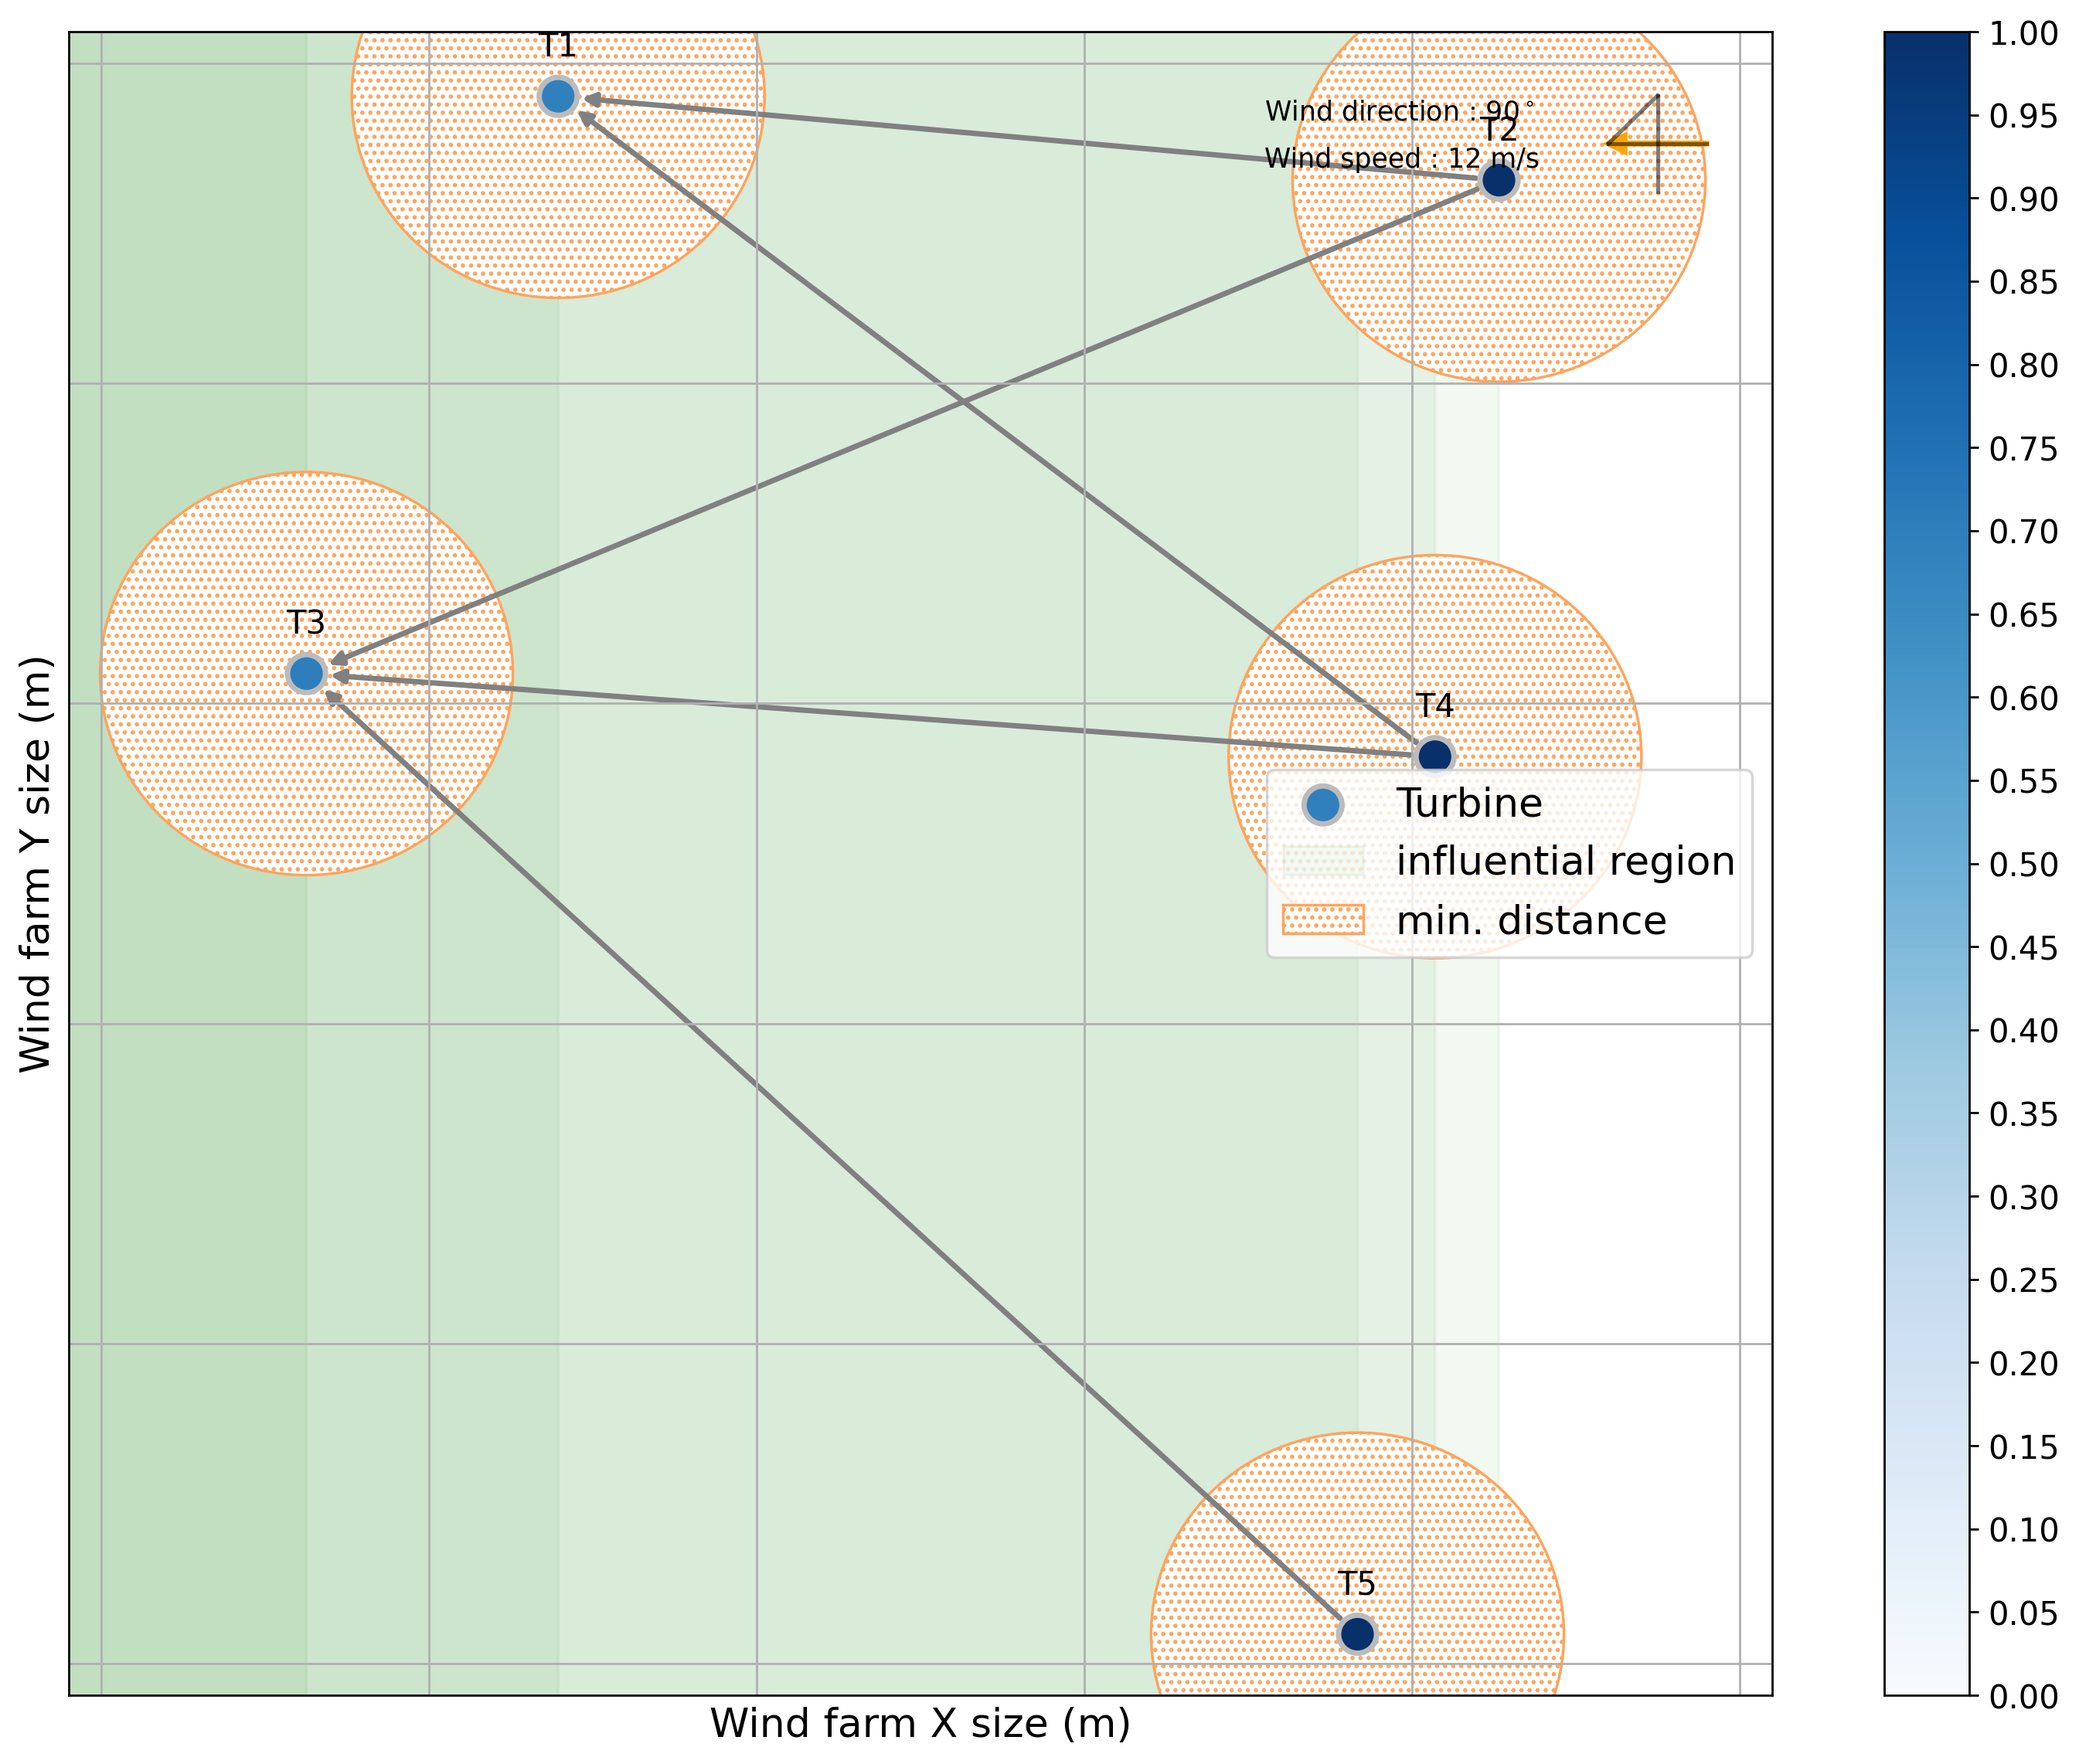

In [4]:
ws = 12
wd = 90
ag_th = 45
farm.update_graph(wind_speed=ws, wind_direction=wd, angle_threshold=ag_th)
farm.visualize_farm()

In [5]:
g, u = farm.observe()

In [6]:
import numpy as np
powers = list(np.array(g.ndata['power'].tolist())[:,0])
positions = list(zip(
    np.array(g.ndata['x'].tolist())[:,0],
    np.array(g.ndata['y'].tolist())[:,0]
))
powers, positions

([0.6951085925102234, 1.0, 0.7026327252388, 1.0, 1.0],
 [(278.8449401855469, 979.5535888671875),
  (853.2183227539062, 927.1312255859375),
  (125.18069458007812, 618.6951293945312),
  (814.1709594726562, 566.7650146484375),
  (766.8579711914062, 18.191730499267578)])

In [7]:
g.ndata.keys(), g.ndata

(dict_keys(['x', 'y', 'power', 'wind_speed', 'feat']),
 {'x': tensor([[278.8449],
         [853.2183],
         [125.1807],
         [814.1710],
         [766.8580]]), 'y': tensor([[979.5536],
         [927.1312],
         [618.6951],
         [566.7650],
         [ 18.1917]]), 'power': tensor([[0.6951],
         [1.0000],
         [0.7026],
         [1.0000],
         [1.0000]]), 'wind_speed': tensor([[12.],
         [12.],
         [12.],
         [12.],
         [12.]]), 'feat': tensor([[12.],
         [12.],
         [12.],
         [12.],
         [12.]])})

In [8]:
g.edata.keys(), g.edata # feat = zip(down_stream_dist, radial_dist)

(dict_keys(['dist', 'is_in_influential_region', 'down_stream_dist', 'radial_dist', 'feat']),
 {'dist': tensor([[576.7607],
         [790.6779],
         [675.9944],
         [690.9445],
         [878.8367]]), 'is_in_influential_region': tensor([[True],
         [True],
         [True],
         [True],
         [True]]), 'down_stream_dist': tensor([[ 52.4224],
         [308.4361],
         [412.7886],
         [ 51.9301],
         [600.5034]]), 'radial_dist': tensor([[574.3734],
         [728.0376],
         [535.3260],
         [688.9902],
         [641.6772]]), 'feat': tensor([[ 52.4224, 574.3734],
         [308.4361, 728.0376],
         [412.7886, 535.3260],
         [ 51.9301, 688.9902],
         [600.5034, 641.6772]])})

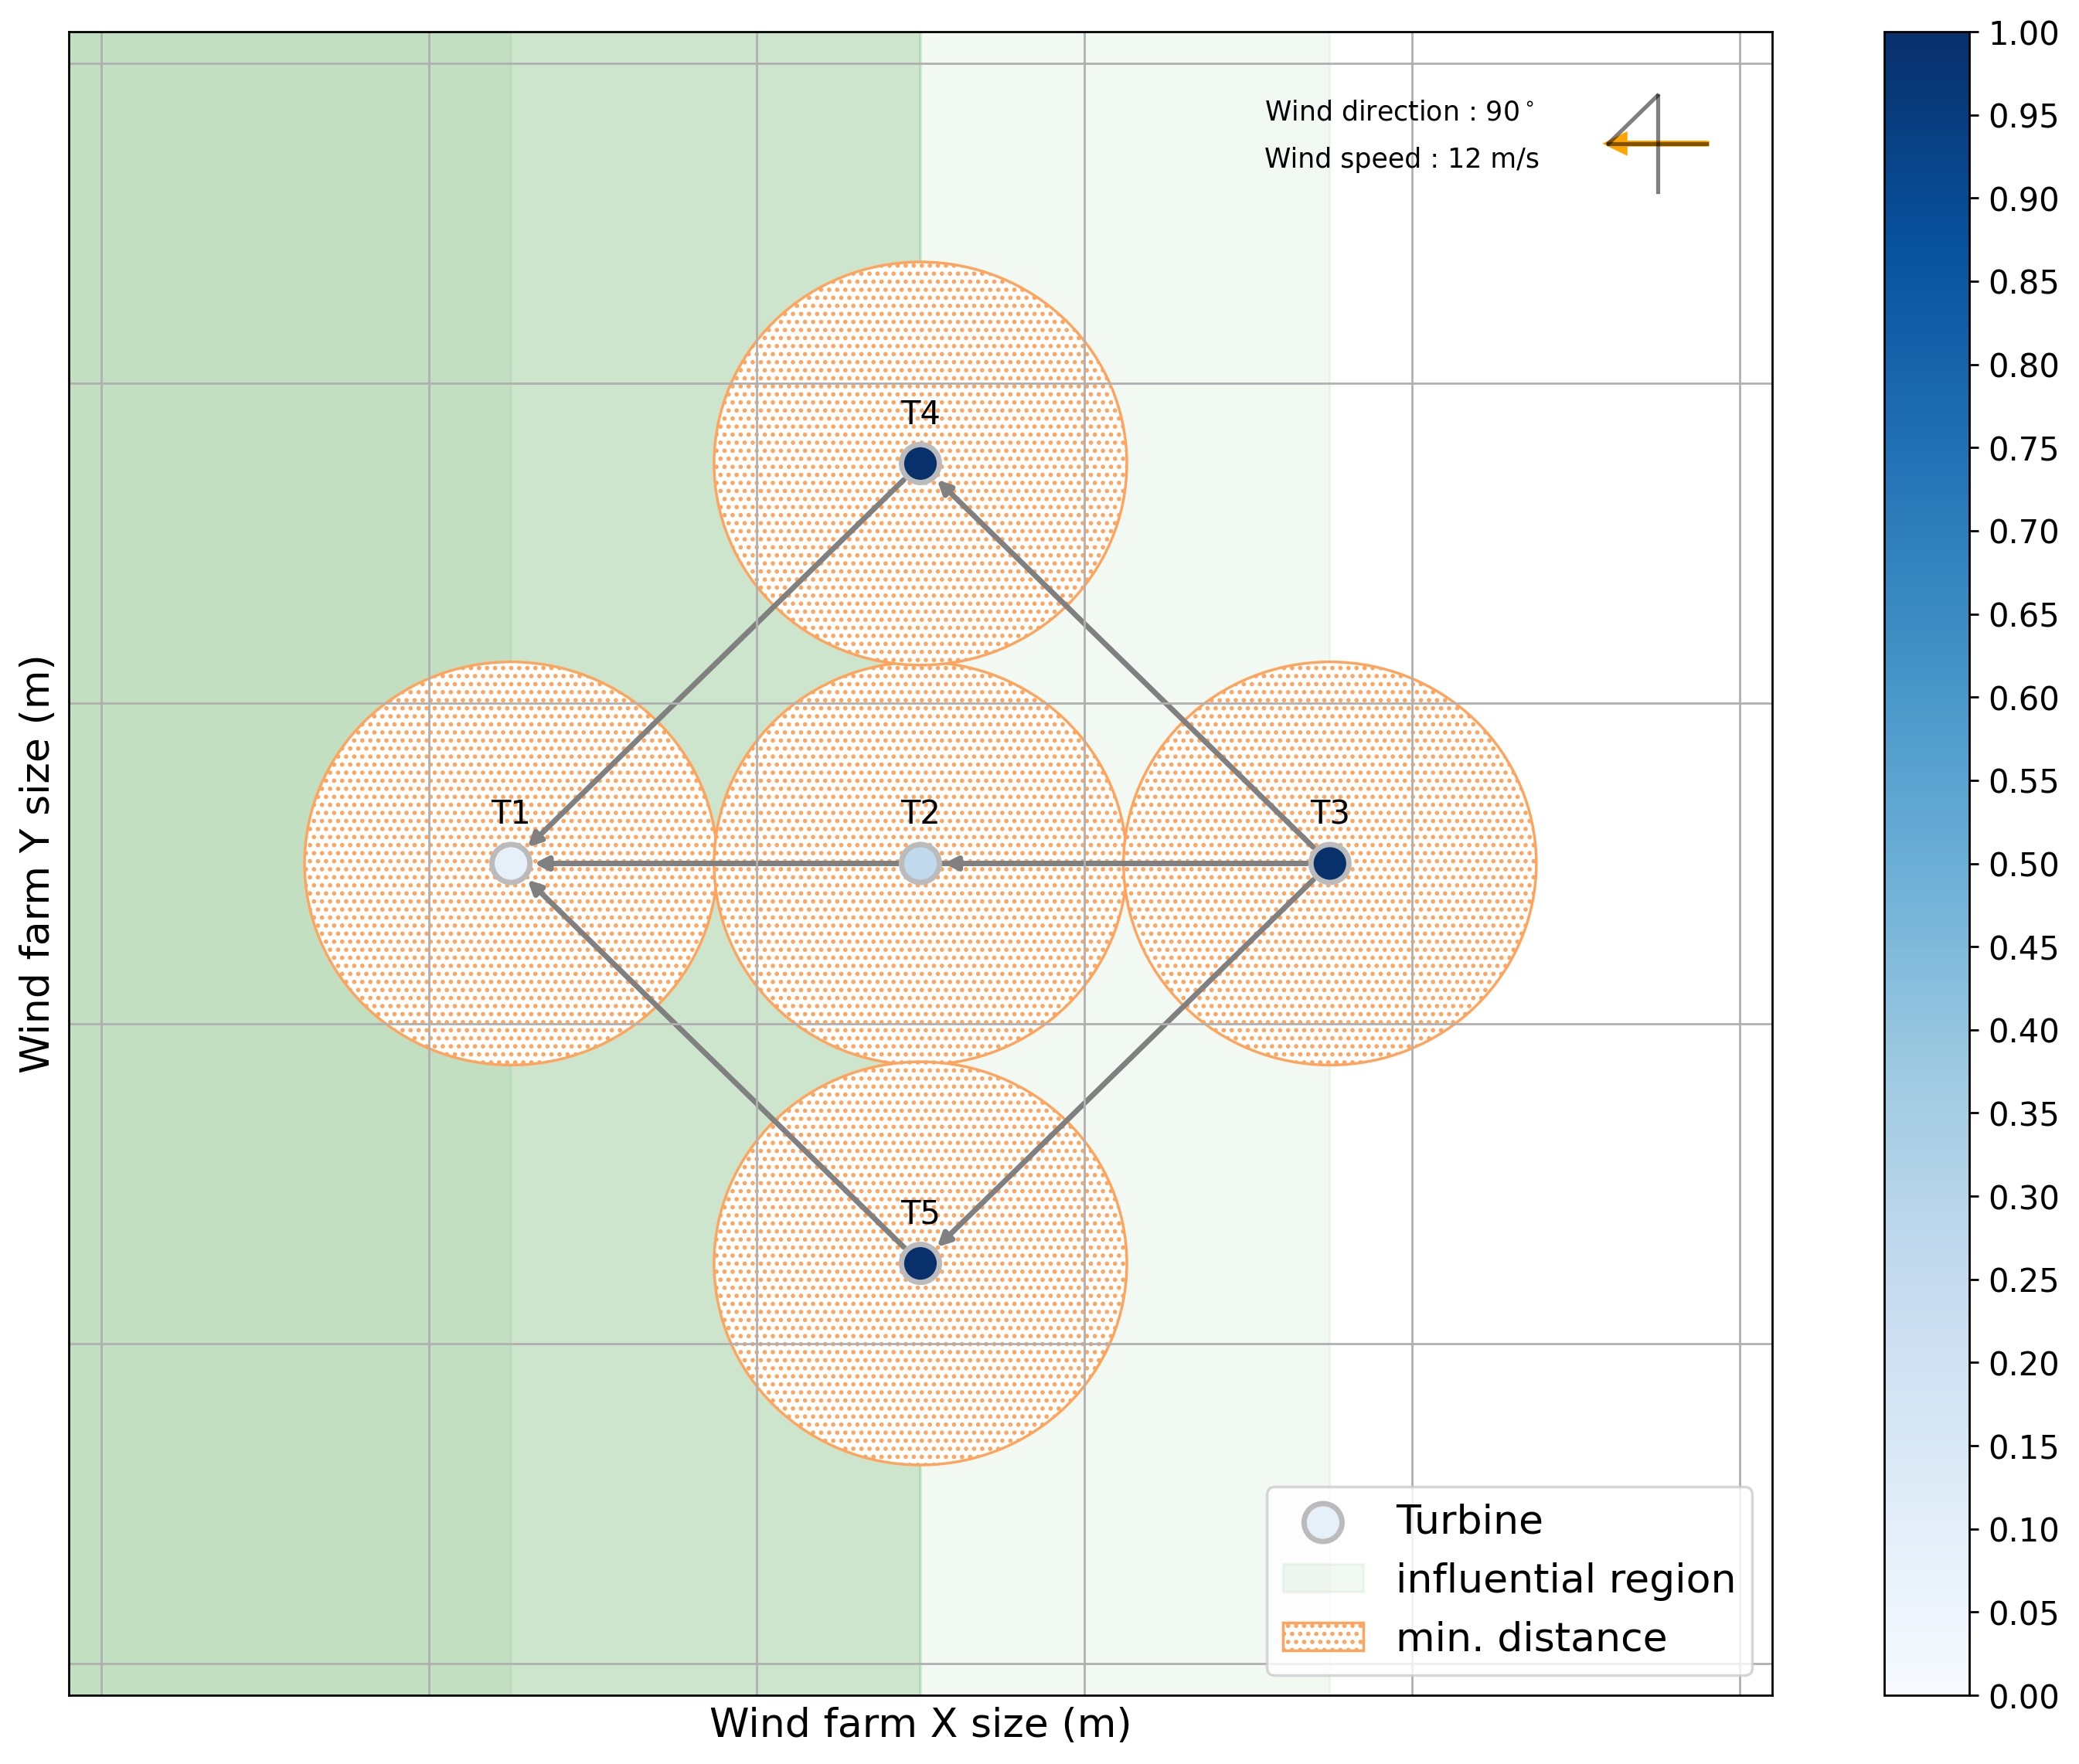

In [9]:
ws = 12
wd = 90
ag_th = 45
farm.update_graph(wind_speed=ws, wind_direction=wd, 
                  xs=[250., 500., 750., 500., 500.], 
                  ys=[500., 500., 500., 750., 250.], 
                  angle_threshold=ag_th)
farm.visualize_farm()

In [10]:
g, u = farm.observe()
g.ndata['power']

tensor([[0.0891],
        [0.2658],
        [1.0000],
        [1.0000],
        [1.0000]])

In [16]:
from tqdm.auto import trange
step = 5
grid= []
ys = trange(600, 400, -step)
xs = range(0, 1001, step)
for y in ys:
    row = []
    for x in xs:
        farm.update_graph(wind_speed=10, wind_direction=-90, 
                          xs=[-1., float(x)], 
                          ys=[500., float(y)], 
                          angle_threshold=ag_th)
        g, u = farm.observe()
        row.append(float(g.ndata['power'][1][0]))
    grid.append(row)

  0%|          | 0/40 [00:00<?, ?it/s]

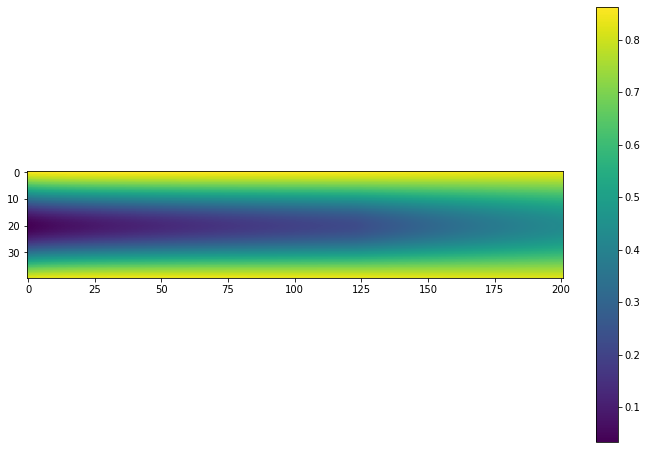

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.imshow(grid)
plt.colorbar()

In [18]:
import pandas as pd
df = pd.DataFrame(grid, columns=xs, index=ys)

<AxesSubplot:>

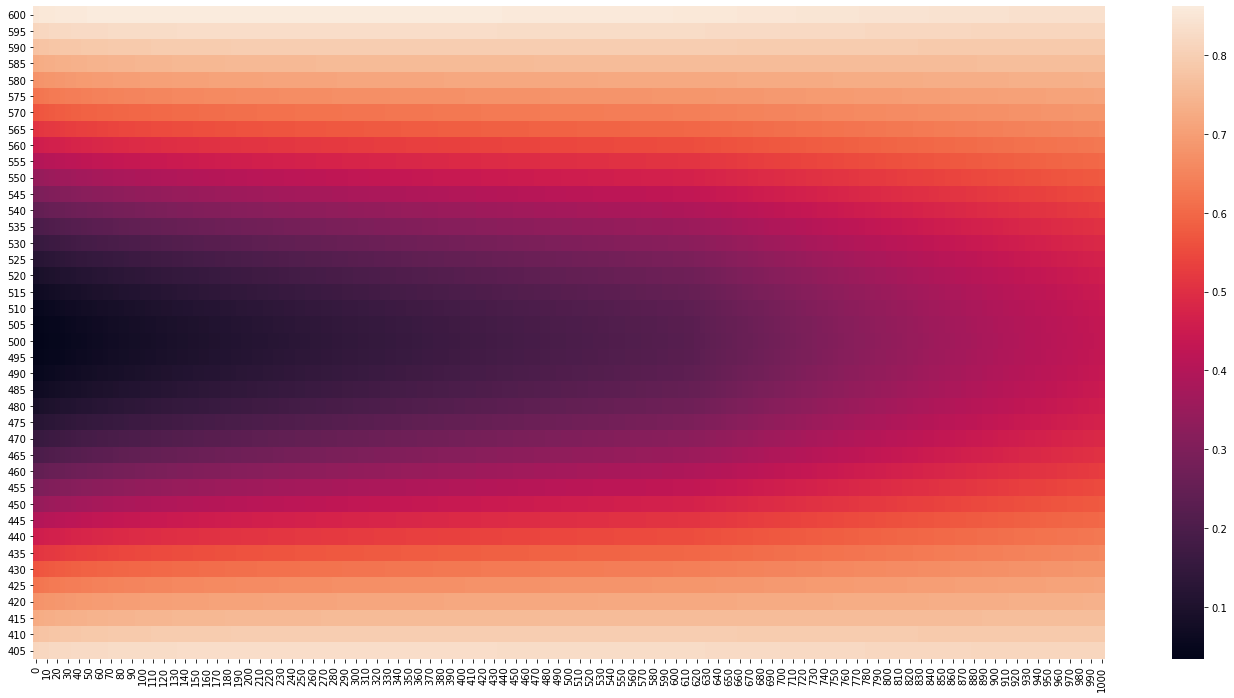

In [19]:
import seaborn as sns
plt.figure(figsize=(24, 12))
sns.heatmap(df)

In [1]:
import plotly.express as px
fig = px.imshow(df)
fig.show()

/Users/romainfouilland/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


NameError: name 'df' is not defined